**Yalla Dhinakar - Resume**

**Profile**  
An innovative thinker, looking for a role where I can grow and learn from experienced team members while drawing on project experience.

---

**Skills**  
- Python  
- HTML  
- CSS  
- SQL  
- Decision Making  
- Communication  
- Teamwork  

---

**Hobbies**  
- Playing games  
- Listening to music  
- Art  

---

**Education Background**  
- **Bachelor of Technology**  
  Karunya Institute of Technology and Science, Coimbatore  
  2020-2024 | CGPA: 7.1  

- **Senior Secondary (XII)**  
  Aditya Junior College, Bhimavaram  
  2018-2020 | CGPA: 7.2  

- **Secondary School (X)**  
  St. Anns (EM) School, Bhimavaram  
  2017-2018 | CGPA: 9.0  

---

**Internships**  
- **Programming Essentials**  
  Cisco | May 2022 - June 2022  

- **Cyber Security Intern**  
  Cisco | May 2023 - June 2023  

---

**Certifications**  
- Introduction to IOT (Coursera, April 26, 2021)  
- Introduction to Cybersecurity (Coursera, December 11, 2020)  
- AI for Everyone: Master the Basics (edX, July 26, 2021)  
- Cloud Computing Core (edX, July 29, 2021)  
- Microsoft Certified: Azure Fundamentals (Microsoft, November 10, 2022)  

---

**Personal Projects**  
- **Spam Mail Detection using Machine Learning**  
  Created a spam mail detection system using machine learning.  
  Filtered out unsolicited emails, optimizing user experience and inbox organization.  

- **Sentiment Analysis and Text Categorization of Cancer Medical Records with LSTM**  
  Applied machine learning algorithms to improve the accuracy of predictions in medical data analysis.  

---

**Contact**  
- Email: dhinakaryalla@gmail.com  
- Phone: +7165739601  
- Location: 234 Lisbon Ave, USA 
- LinkedIn: [linkedin.com/in/dhinakaryalla](https://www.linkedin.com/in/dhinakaryalla)  

---

**Languages**  
- Telugu  
- English  
- Tamil  


#my project video
zoomlink:

## My Work With Links

•⁠  ⁠[MLFlow Experiments] (https://dagshub.com/dhinakar/loanmlproject/experiments)  
•⁠  ⁠[Docker Hub Container] (https://hub.docker.com/r/dhinakar7/loanapproval-app)  
•⁠  ⁠[Deployed Model] (https://loanapproval-app-ja5c.onrender.com/predict)  
•⁠  ⁠[Streamlit App] (https://loanproject-gfljruqczws8ufzughwxcu.streamlit.app/)


 Load Data

1.Parse a file using Python (e.g., using the csv module) and create a normalized database from it.
2.Write an SQL query with joins to reconstruct the data and load it into a Pandas DataFrame.


Loan Status Distribution:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64


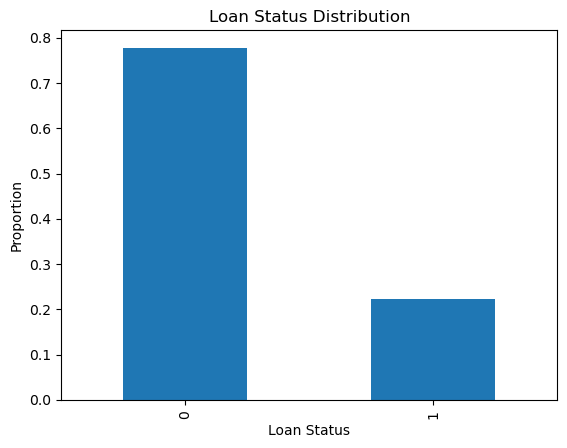


Person_gender Distribution:
person_gender
male      0.552022
female    0.447978
Name: proportion, dtype: float64


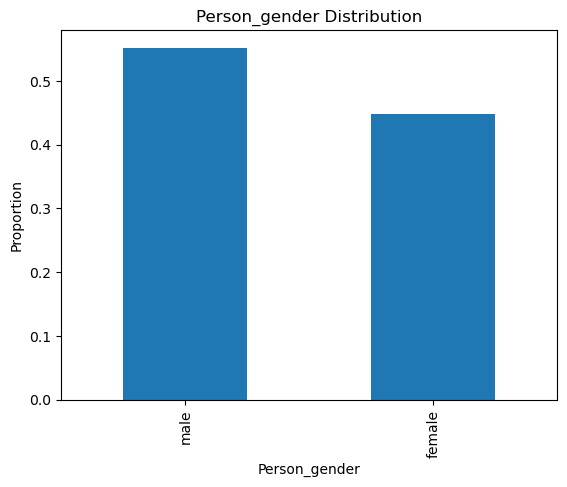


Person_education Distribution:
person_education
Bachelor       0.297756
Associate      0.267289
High School    0.266044
Master         0.155111
Doctorate      0.013800
Name: proportion, dtype: float64


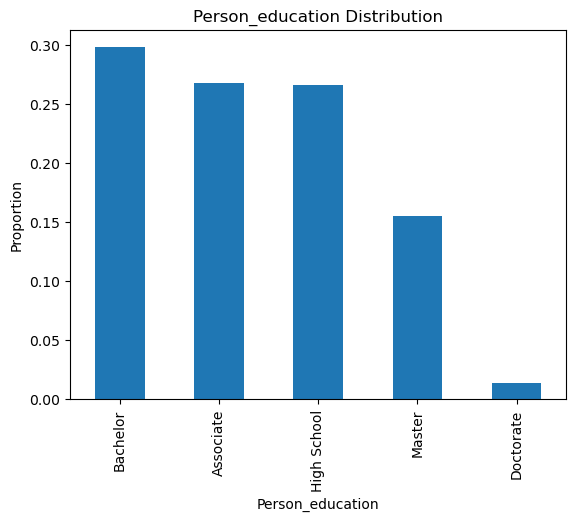


Person_home_ownership Distribution:
person_home_ownership
RENT        0.520956
MORTGAGE    0.410867
OWN         0.065578
OTHER       0.002600
Name: proportion, dtype: float64


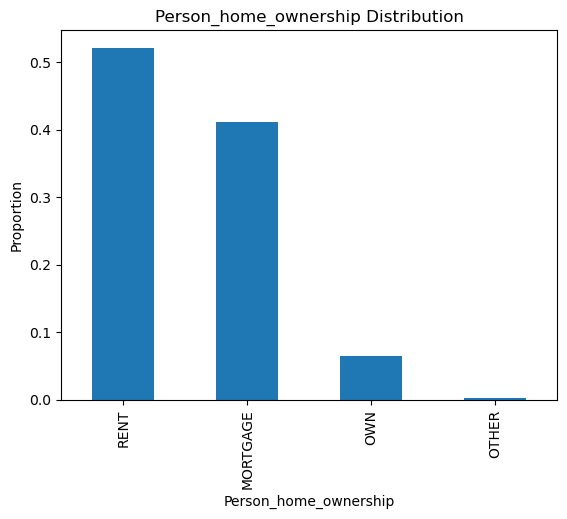


Loan_intent Distribution:
loan_intent
EDUCATION            0.203400
MEDICAL              0.189956
VENTURE              0.173756
PERSONAL             0.167822
DEBTCONSOLIDATION    0.158778
HOMEIMPROVEMENT      0.106289
Name: proportion, dtype: float64


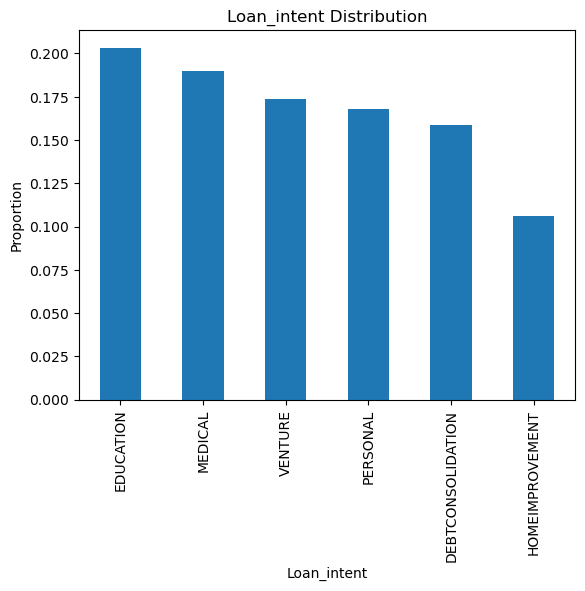


Train set Loan Status Distribution:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

Test set Loan Status Distribution:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64
Train Data:
       person_age person_gender person_education  person_income  \
40335        33.0        female        Associate        66765.0   
22386        29.0        female           Master        51077.0   
28223        28.0          male         Bachelor       125883.0   
2906         23.0          male           Master        42983.0   
41710        29.0          male           Master        51615.0   

       person_emp_exp person_home_ownership  loan_amnt      loan_intent  \
40335              14                  RENT    10000.0          MEDICAL   
22386               7                  RENT     7000.0        EDUCATION   
28223               6              MORTGAGE    18000.0  HOMEIMPROVEMENT   
2906                1              MORTGAGE     3825.0          VE

In [14]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'loan_data.csv'
loan_data = pd.read_csv(file_path)

# Step 1: Explore the target attribute (LoanStatus) distribution
loan_status_counts = loan_data['loan_status'].value_counts(normalize=True)
print("Loan Status Distribution:")
print(loan_status_counts)

# Plot the distribution of LoanStatus
loan_status_counts.plot(kind='bar')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.show()

# Step 2: Check other categorical attributes for stratification
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent']
for column in categorical_columns:
    print(f"\n{column.capitalize()} Distribution:")
    print(loan_data[column].value_counts(normalize=True))
    loan_data[column].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'{column.capitalize()} Distribution')
    plt.xlabel(column.capitalize())
    plt.ylabel('Proportion')
    plt.show()

# Step 3: Decide stratification
# Based on the target variable's distribution, we stratify by 'loan_status' to ensure proportional representation
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

# Perform train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Confirm stratification in the split
print("\nTrain set Loan Status Distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set Loan Status Distribution:")
print(y_test.value_counts(normalize=True))

# Combine X_train and y_train into a single DataFrame for inspection
train_data = X_train.copy()
train_data['loan_status'] = y_train
test_data = X_test.copy()
test_data['loan_status'] = y_test

# Display Train Data
print("Train Data:")
print(train_data.head())

# Save Train Data to a CSV file
train_data.to_csv("train_data.csv", index=False)
print("Train data saved to 'train_data.csv'.")

# Display Test Data
print("\nTest Data:")
print(test_data.head())

# Save Test Data to a CSV file
test_data.to_csv("test_data.csv", index=False)
print("Test data saved to 'test_data.csv'.")

# Step 4: Normalize the data into a SQLite database
db_file_path = "loan_data_normalized.db"  # File path for the normalized database

# Create an SQLite database connection
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

# Define the schema for normalized tables
cursor.execute("""
CREATE TABLE Person (
    person_id INTEGER PRIMARY KEY AUTOINCREMENT,
    age REAL,
    gender TEXT,
    education TEXT,
    income REAL,
    emp_exp REAL,
    home_ownership TEXT
);
""")

cursor.execute("""
CREATE TABLE Loan (
    loan_id INTEGER PRIMARY KEY AUTOINCREMENT,
    person_id INTEGER,
    amount REAL,
    intent TEXT,
    int_rate REAL,
    percent_income REAL,
    status INTEGER,
    FOREIGN KEY(person_id) REFERENCES Person(person_id)
);
""")

cursor.execute("""
CREATE TABLE Credit (
    credit_id INTEGER PRIMARY KEY AUTOINCREMENT,
    person_id INTEGER,
    cred_hist_length REAL,
    credit_score INTEGER,
    previous_defaults TEXT,
    FOREIGN KEY(person_id) REFERENCES Person(person_id)
);
""")

# Populate the tables from the CSV data
for _, row in loan_data.iterrows():
    cursor.execute("""
        INSERT INTO Person (age, gender, education, income, emp_exp, home_ownership)
        VALUES (?, ?, ?, ?, ?, ?);
    """, (row['person_age'], row['person_gender'], row['person_education'], 
          row['person_income'], row['person_emp_exp'], row['person_home_ownership']))
    
    person_id = cursor.lastrowid
    
    cursor.execute("""
        INSERT INTO Loan (person_id, amount, intent, int_rate, percent_income, status)
        VALUES (?, ?, ?, ?, ?, ?);
    """, (person_id, row['loan_amnt'], row['loan_intent'], row['loan_int_rate'], 
          row['loan_percent_income'], row['loan_status']))
    
    cursor.execute("""
        INSERT INTO Credit (person_id, cred_hist_length, credit_score, previous_defaults)
        VALUES (?, ?, ?, ?);
    """, (person_id, row['cb_person_cred_hist_length'], row['credit_score'], 
          row['previous_loan_defaults_on_file']))

conn.commit()

# Write SQL to reconstruct the data with JOINs
query = """
SELECT 
    Person.age, Person.gender, Person.education, Person.income, Person.emp_exp, Person.home_ownership,
    Loan.amount, Loan.intent, Loan.int_rate, Loan.percent_income, Loan.status,
    Credit.cred_hist_length, Credit.credit_score, Credit.previous_defaults
FROM 
    Person
JOIN 
    Loan ON Person.person_id = Loan.person_id
JOIN 
    Credit ON Person.person_id = Credit.person_id;
"""

# Execute the query and load it into a Pandas DataFrame
reconstructed_data = pd.read_sql_query(query, conn)

# Display Reconstructed Data
print("\nReconstructed Data:")
print(reconstructed_data.head())

# Save Reconstructed Data to a CSV file
reconstructed_data.to_csv("reconstructed_data.csv", index=False)
print("Reconstructed data saved to 'reconstructed_data.csv'.")

# Close the database connection
conn.close()


Explore the data to determine if you need to stratify it by some attribute when doing train/test split. Perform the train/test split.

Loan Status Distribution:
status
0    0.777778
1    0.222222
Name: proportion, dtype: float64


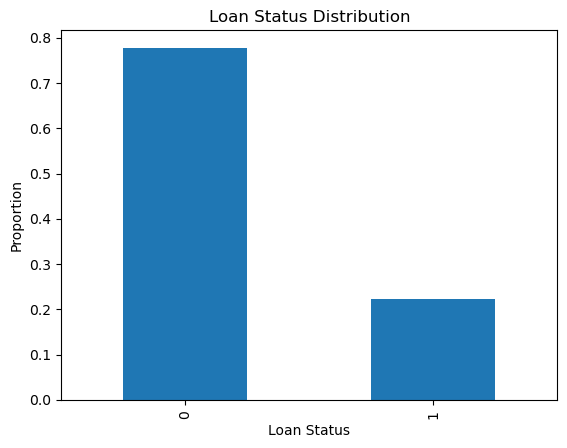


Gender Distribution:
gender
male      0.552022
female    0.447978
Name: proportion, dtype: float64


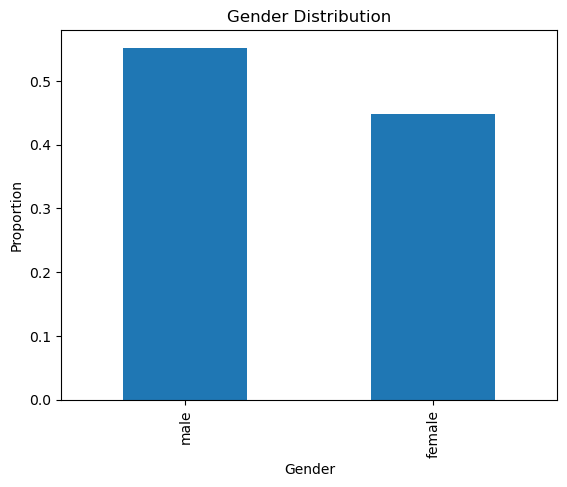


Education Distribution:
education
Bachelor       0.297756
Associate      0.267289
High School    0.266044
Master         0.155111
Doctorate      0.013800
Name: proportion, dtype: float64


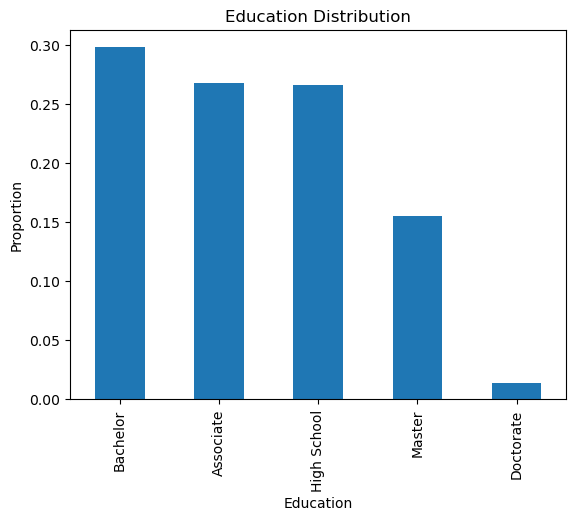


Home_ownership Distribution:
home_ownership
RENT        0.520956
MORTGAGE    0.410867
OWN         0.065578
OTHER       0.002600
Name: proportion, dtype: float64


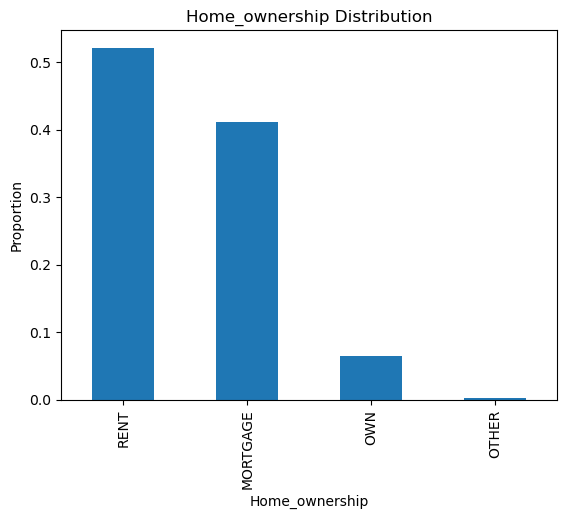


Intent Distribution:
intent
EDUCATION            0.203400
MEDICAL              0.189956
VENTURE              0.173756
PERSONAL             0.167822
DEBTCONSOLIDATION    0.158778
HOMEIMPROVEMENT      0.106289
Name: proportion, dtype: float64


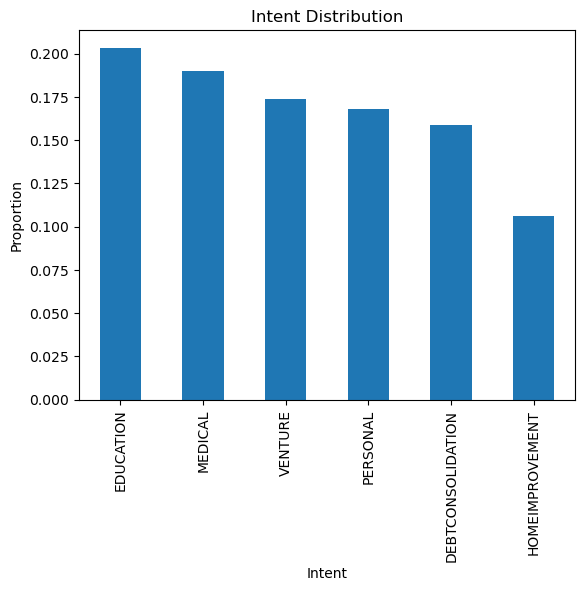


Train set Loan Status Distribution:
status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

Test set Loan Status Distribution:
status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

Train Data Preview:
        age  gender  education    income  emp_exp home_ownership   amount  \
40335  33.0  female  Associate   66765.0     14.0           RENT  10000.0   
22386  29.0  female     Master   51077.0      7.0           RENT   7000.0   
28223  28.0    male   Bachelor  125883.0      6.0       MORTGAGE  18000.0   
2906   23.0    male     Master   42983.0      1.0       MORTGAGE   3825.0   
41710  29.0    male     Master   51615.0      6.0            OWN   8000.0   

                intent  int_rate  percent_income  cred_hist_length  \
40335          MEDICAL      9.46            0.15               6.0   
22386        EDUCATION      5.79            0.14              10.0   
28223  HOMEIMPROVEMENT     10.99            0.14              10.0   
2906           VENTURE     

In [16]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `reconstructed_data` is already defined
# Step 1: Explore the target attribute (LoanStatus) distribution
loan_status_counts = reconstructed_data['status'].value_counts(normalize=True)
print("Loan Status Distribution:")
print(loan_status_counts)

# Plot the distribution of LoanStatus
loan_status_counts.plot(kind='bar')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.show()

# Step 2: Check other categorical attributes for stratification
categorical_columns = ['gender', 'education', 'home_ownership', 'intent']
for column in categorical_columns:
    print(f"\n{column.capitalize()} Distribution:")
    print(reconstructed_data[column].value_counts(normalize=True))
    reconstructed_data[column].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'{column.capitalize()} Distribution')
    plt.xlabel(column.capitalize())
    plt.ylabel('Proportion')
    plt.show()

# Step 3: Decide stratification
# Based on the target variable's distribution, we stratify by 'status' (LoanStatus) to ensure proportional representation
X = reconstructed_data.drop(columns=['status'])
y = reconstructed_data['status']

# Perform train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Confirm stratification in the split
print("\nTrain set Loan Status Distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set Loan Status Distribution:")
print(y_test.value_counts(normalize=True))

# Combine X_train and y_train into a single DataFrame for inspection
train_data = X_train.copy()
train_data['status'] = y_train
test_data = X_test.copy()
test_data['status'] = y_test

# Display the split data and save to CSV for inspection
print("\nTrain Data Preview:")
print(train_data.head())
train_data.to_csv("train_data.csv", index=False)
print("Train data saved to 'train_data.csv'.")

print("\nTest Data Preview:")
print(test_data.head())
test_data.to_csv("test_data.csv", index=False)
print("Test data saved to 'test_data.csv'.")


Explore the data using yprofile and correlation matrix. Make observations about features, distributions, capped values, and missing values. Create a list of data cleanup tasks

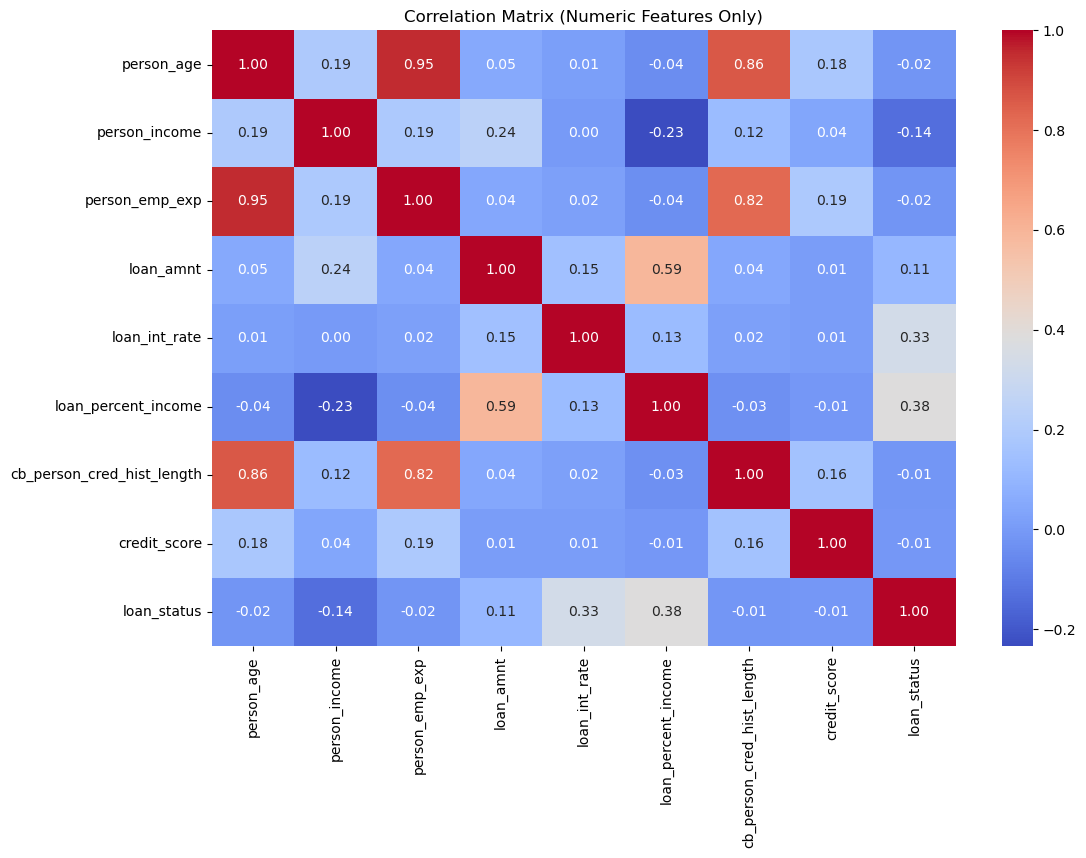

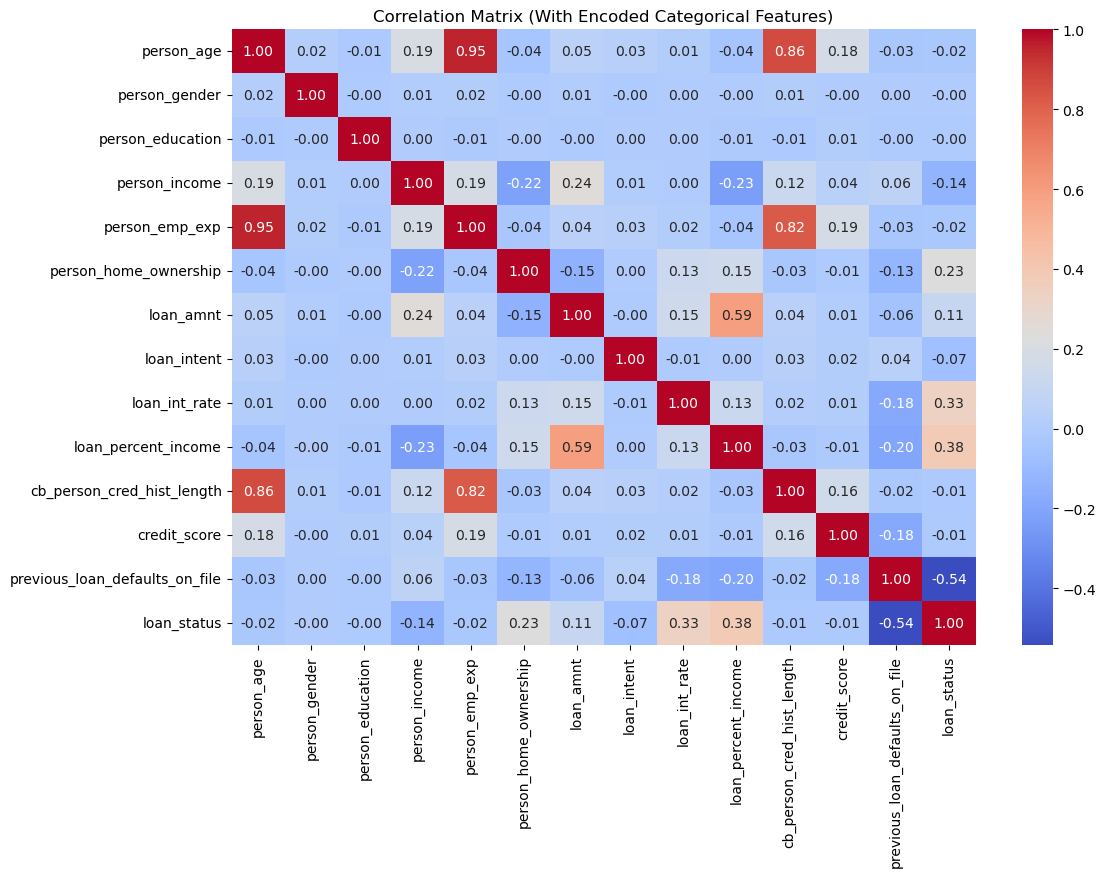

Correlation Matrix (Numeric Features Only):
                            person_age  person_income  person_emp_exp  \
person_age                    1.000000       0.193698        0.954412   
person_income                 0.193698       1.000000        0.185987   
person_emp_exp                0.954412       0.185987        1.000000   
loan_amnt                     0.050750       0.242290        0.044589   
loan_int_rate                 0.013402       0.001510        0.016631   
loan_percent_income          -0.043299      -0.234177       -0.039862   
cb_person_cred_hist_length    0.861985       0.124316        0.824272   
credit_score                  0.178432       0.035919        0.186196   
loan_status                  -0.021476      -0.135808       -0.020481   

                            loan_amnt  loan_int_rate  loan_percent_income  \
person_age                   0.050750       0.013402            -0.043299   
person_income                0.242290       0.001510            -0.2341

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'loan_data.csv'
loan_data = pd.read_csv(file_path)

# Step 1: Select only numeric columns for correlation matrix
numeric_columns = loan_data.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

# Optional: Include categorical variables in the correlation matrix
# Encode categorical variables
encoded_data = loan_data.copy()
categorical_columns = loan_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    encoder = LabelEncoder()
    encoded_data[col] = encoder.fit_transform(loan_data[col])

# Compute the correlation matrix with encoded data
correlation_matrix_encoded = encoded_data.corr()

# Visualize the new correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (With Encoded Categorical Features)")
plt.show()

# Observations
print("Correlation Matrix (Numeric Features Only):")
print(correlation_matrix)

print("\nCorrelation Matrix (With Encoded Categorical Features):")
print(correlation_matrix_encoded)


Experiment #1: Create a pipeline for preprocessing (StandardScaler, MinMaxScaler, LogTransformation, OneHotEncoding) and Logistic Regression. Log F1-score/(TP,TN,FN,FP)  in MLFlow on DagsHub. – Cross validation 3/10 folds. Results—mean/std of CV results and results on the whole training data – add in parameter hyper tuning

In [8]:
import os
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn

# Load data
file_path = 'loan_data.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),  # StandardScaler
    ('minmax', MinMaxScaler()),   # MinMaxScaler
    ('log', FunctionTransformer(np.log1p, validate=True))  # LogTransformation
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoding
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1.0, 10],
    'classifier__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# Best estimator
best_model = grid_search.best_estimator_

# Cross-validation
cv_results = cross_validate(best_model, X_train, y_train, cv=10, scoring='f1', return_train_score=True)

# Calculate mean/std of CV results
cv_mean = np.mean(cv_results['test_score'])
cv_std = np.std(cv_results['test_score'])

# Evaluate on test data
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Set up MLFlow tracking
try:
    # Ensure environment variables for DagsHub
    os.environ['MLFLOW_TRACKING_USERNAME'] = "dhinakar"
    os.environ['MLFLOW_TRACKING_PASSWORD'] = "6f27af130299a43391d00a574d479c20cb1dff19"

    mlflow.set_tracking_uri("https://dagshub.com/dhinakar/loanmlproject.mlflow")
    mlflow.set_experiment("Loan Default Prediction")
except Exception as e:
    print(f"DagsHub connection failed. Falling back to local tracking. Error: {e}")
    mlflow.set_tracking_uri("file:///tmp/mlruns")
    mlflow.set_experiment("Loan Default Prediction")

# Log results to MLFlow
with mlflow.start_run():
    mlflow.log_param("cv_folds", 10)
    mlflow.log_param("hyperparameters", grid_search.best_params_)
    
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("cv_mean_f1", cv_mean)
    mlflow.log_metric("cv_std_f1", cv_std)
    mlflow.log_metric("True Positives", tp)
    mlflow.log_metric("True Negatives", tn)
    mlflow.log_metric("False Positives", fp)
    mlflow.log_metric("False Negatives", fn)
    
    mlflow.sklearn.log_model(best_model, "logistic_regression_pipeline")

# Print results
print("F1 Score:", f1)
print("Confusion Matrix: TP={}, TN={}, FP={}, FN={}".format(tp, tn, fp, fn))
print("CV Results: Mean F1={} | Std F1={}".format(cv_mean, cv_std))


Fitting 3 folds for each of 6 candidates, totalling 18 fits


2024/12/20 20:32:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run sneaky-loon-723 at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/2/runs/03fa2c617b4b4611a2d0f3a5cbdd55ef
🧪 View experiment at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/2
F1 Score: 0.7581666244618891
Confusion Matrix: TP=1497, TN=6548, FP=442, FN=513
CV Results: Mean F1=0.7622827780981457 | Std F1=0.011527436067466985


Experiment #2: Create a pipeline for preprocessing and use LogisticRegression, RidgeClassifier, RandomForestClassifier, and XGBClassifier. Log results in MLFlow on DagsHub.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
import mlflow.xgboost

# Load data
file_path = 'loan_data.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing with missing value handling
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numeric values with mean
    ('scaler', StandardScaler())  # StandardScaler
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoding
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RidgeClassifier': RidgeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Set up MLFlow tracking
try:
    os.environ['MLFLOW_TRACKING_USERNAME'] = "dhinakar"
    os.environ['MLFLOW_TRACKING_PASSWORD'] = "6f27af130299a43391d00a574d479c20cb1dff19"

    mlflow.set_tracking_uri("https://dagshub.com/dhinakar/loanmlproject.mlflow")
    mlflow.set_experiment("Loan Default Prediction - Experiment 2")
except Exception as e:
    print(f"DagsHub connection failed. Falling back to local tracking. Error: {e}")
    mlflow.set_tracking_uri("file:///tmp/mlruns")
    mlflow.set_experiment("Loan Default Prediction - Experiment 2")

# Train, evaluate, and log results for each classifier
for name, clf in classifiers.items():
    print(f"Running {name}...")
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
    
    # Train and evaluate on the test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Log results to MLFlow
    with mlflow.start_run(run_name=name):
        # Log parameters
        mlflow.log_param("classifier", name)
        if hasattr(clf, 'get_params'):
            mlflow.log_params(clf.get_params())
        
        # Log metrics
        mlflow.log_metric("test_f1", f1)
        mlflow.log_metric("cv_mean_f1", np.mean(cv_scores))
        mlflow.log_metric("cv_std_f1", np.std(cv_scores))
        mlflow.log_metric("True Positives", tp)
        mlflow.log_metric("True Negatives", tn)
        mlflow.log_metric("False Positives", fp)
        mlflow.log_metric("False Negatives", fn)
        
        # Log model
        if name == 'XGBClassifier':
            mlflow.xgboost.log_model(clf, artifact_path=name)
        else:
            mlflow.sklearn.log_model(pipeline, artifact_path=name)
        
    print(f"{name} completed! F1 Score: {f1}")

# Print final message
print("Experiment #2 completed successfully!")


Running LogisticRegression...


2024/12/19 22:25:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/3/runs/38b1fab0b89b4cf3b26034227b695c81
🧪 View experiment at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/3
LogisticRegression completed! F1 Score: 0.7585856016280844
Running RidgeClassifier...


2024/12/19 22:25:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RidgeClassifier at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/3/runs/b071ea646445468aa7917a03a20ef676
🧪 View experiment at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/3
RidgeClassifier completed! F1 Score: 0.735476898135639
Running RandomForestClassifier...


2024/12/19 22:26:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestClassifier at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/3/runs/80357909b0454ac0ad47af9eb5e362ed
🧪 View experiment at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/3
RandomForestClassifier completed! F1 Score: 0.8300479488545551
Running XGBClassifier...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:26:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:26:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:26:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:26:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

🏃 View run XGBClassifier at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/3/runs/e6d8d2854ead4fe8b118b0cf2794b634
🧪 View experiment at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/3
XGBClassifier completed! F1 Score: 0.8499480789200415
Experiment #2 completed successfully!


Experiment #3: Perform feature engineering and attribute combination. Log results in MLFlow

In [116]:
import os
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
import mlflow
import mlflow.sklearn

# Load data
file_path = 'loan_data.csv'
data = pd.read_csv(file_path)

# Feature Engineering
data['income_to_loan'] = data['person_income'] / data['loan_amnt']  # Ratio of income to loan amount
data['log_income'] = np.log1p(data['person_income'])  # Log-transformed income
data['loan_to_employment'] = data['loan_amnt'] / (data['person_emp_exp'] + 1)  # Loan amount per year of experience
data['credit_to_income'] = data['credit_score'] / data['person_income']  # Credit score per income unit

# Handle infinite or missing values resulting from transformations
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Separate features and target
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing with missing value handling
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define pipeline with feature selection
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),  # Select top 10 features
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression
])

# Set up MLFlow tracking
try:
    os.environ['MLFLOW_TRACKING_USERNAME'] = "dhinakar"
    os.environ['MLFLOW_TRACKING_PASSWORD'] = "6f27af130299a43391d00a574d479c20cb1dff19"

    mlflow.set_tracking_uri("https://dagshub.com/dhinakar/loanmlproject.mlflow")
    mlflow.set_experiment("Loan Default Prediction - Experiment 3")
except Exception as e:
    print(f"DagsHub connection failed. Falling back to local tracking. Error: {e}")
    mlflow.set_tracking_uri("file:///tmp/mlruns")
    mlflow.set_experiment("Loan Default Prediction - Experiment 3")

# Train and evaluate with cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

# Fit and predict on test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculate metrics
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Log results to MLFlow
with mlflow.start_run():
    # Log feature engineering steps
    mlflow.log_param("engineered_features", ["income_to_loan", "log_income", "loan_to_employment", "credit_to_income"])
    
    # Log metrics
    mlflow.log_metric("test_f1", f1)
    mlflow.log_metric("cv_mean_f1", np.mean(cv_scores))
    mlflow.log_metric("cv_std_f1", np.std(cv_scores))
    mlflow.log_metric("True Positives", tp)
    mlflow.log_metric("True Negatives", tn)
    mlflow.log_metric("False Positives", fp)
    mlflow.log_metric("False Negatives", fn)
    
    # Log model
    mlflow.sklearn.log_model(pipeline, "logistic_regression_pipeline")

# Print results
print("Experiment #3 Results")
print("F1 Score:", f1)
print("Confusion Matrix: TP={}, TN={}, FP={}, FN={}".format(tp, tn, fp, fn))
print("CV Results: Mean F1={} | Std F1={}".format(np.mean(cv_scores), np.std(cv_scores)))


2024/12/19 17:50:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run glamorous-trout-854 at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/4/runs/b7c1777df3c5447e9bec0f75ddf16bf8
🧪 View experiment at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/4
Experiment #3 Results
F1 Score: 0.7410601065178798
Confusion Matrix: TP=1461, TN=6518, FP=472, FN=549
CV Results: Mean F1=0.7548470345095865 | Std F1=0.008684844006255134


In [59]:
pip install mlflow


Note: you may need to restart the kernel to use updated packages.


Experiment #4: Perform feature selection using Correlation Threshold, Feature Importance, and Variance Threshold. Log results in MLFlow.

In [118]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn

# Load data
file_path = 'loan_data.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 1: Variance Threshold
variance_selector = VarianceThreshold(threshold=0.01)
X_train_var = variance_selector.fit_transform(X_train[numeric_features])
low_variance_features = [numeric_features[i] for i in range(len(numeric_features)) if variance_selector.variances_[i] < 0.01]

# Step 2: Correlation Threshold
# Compute correlations for numeric features only
corr_matrix = X_train[numeric_features].corr().abs()
high_corr_features = [
    column for column in corr_matrix.columns 
    if any(corr_matrix[column] > 0.8)
]

# Step 3: Feature Importance with Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train[numeric_features], y_train)
feature_importances = rf.feature_importances_

# Keep top 5 important features
top_features = [numeric_features[i] for i in np.argsort(feature_importances)[-5:]]

# Combine all selected features for final training
final_features = list(set(numeric_features) - set(low_variance_features) - set(high_corr_features) | set(top_features))
X_train_selected = X_train[final_features]
X_test_selected = X_test[final_features]

# Step 4: Build and Evaluate Model
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train and evaluate the model
cv_scores = cross_val_score(pipeline, X_train_selected, y_train, cv=5, scoring='f1')
pipeline.fit(X_train_selected, y_train)
y_pred = pipeline.predict(X_test_selected)

# Calculate metrics
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Log results in MLFlow
try:
    os.environ['MLFLOW_TRACKING_USERNAME'] = "dhinakar"
    os.environ['MLFLOW_TRACKING_PASSWORD'] = "6f27af130299a43391d00a574d479c20cb1dff19"

    mlflow.set_tracking_uri("https://dagshub.com/dhinakar/loanmlproject.mlflow")
    mlflow.set_experiment("Loan Default Prediction - Experiment 4")

    with mlflow.start_run():
        mlflow.log_param("method", "Feature Selection: Variance + Correlation + Importance")
        mlflow.log_param("variance_threshold", 0.01)
        mlflow.log_param("correlation_threshold", 0.8)
        mlflow.log_param("top_features", top_features)

        mlflow.log_metric("test_f1", f1)
        mlflow.log_metric("cv_mean_f1", np.mean(cv_scores))
        mlflow.log_metric("cv_std_f1", np.std(cv_scores))
        mlflow.log_metric("True Positives", tp)
        mlflow.log_metric("True Negatives", tn)
        mlflow.log_metric("False Positives", fp)
        mlflow.log_metric("False Negatives", fn)

        mlflow.sklearn.log_model(pipeline, "rf_model_with_feature_selection")

except Exception as e:
    print("Failed to log in MLFlow:", e)

# Output results
print("Experiment #4 Results")
print("F1 Score:", f1)
print("Confusion Matrix: TP={}, TN={}, FP={}, FN={}".format(tp, tn, fp, fn))
print("CV Results: Mean F1={} | Std F1={}".format(np.mean(cv_scores), np.std(cv_scores)))


2024/12/19 17:50:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run thundering-lynx-345 at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/5/runs/537fa6874c1449549aa17673846a28b8
🧪 View experiment at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/5
Experiment #4 Results
F1 Score: 0.6749174917491749
Confusion Matrix: TP=1227, TN=6591, FP=399, FN=783
CV Results: Mean F1=0.6727692625914619 | Std F1=0.010781859221086373


Experiment #5: Use PCA for dimensionality reduction on all the features. Create a scree plot to show which components will be selected for classification. Log results in MLFlow.

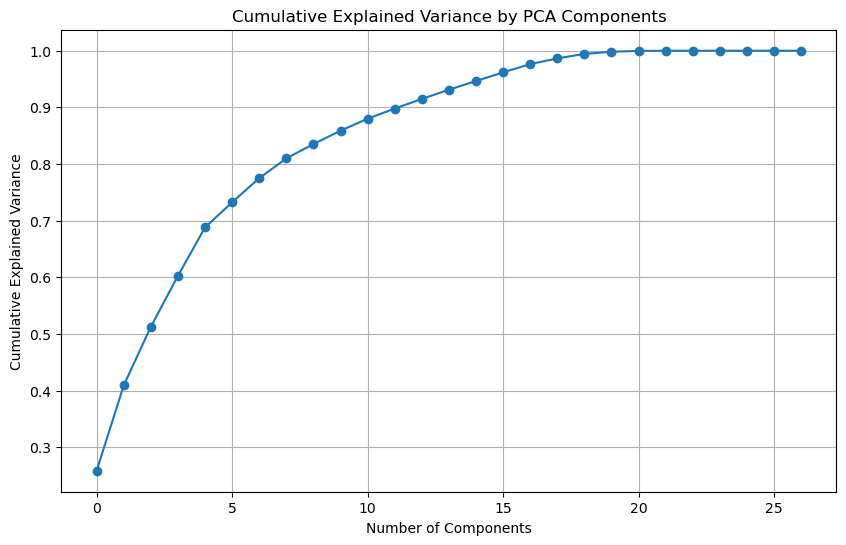

2024/12/19 17:52:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run useful-horse-906 at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/6/runs/cf450d6190f744c882e653545728d2b3
🧪 View experiment at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/6
Tracking URI: https://dagshub.com/dhinakar/loanmlproject.mlflow
Experiment #5 Results
F1 Score: 0.7905869910100476
Confusion Matrix: TP=1495, TN=6713, FP=277, FN=515
CV Results: Mean F1=0.7873984019276448 | Std F1=0.007031816341944248


In [120]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn

# Load data
file_path = 'loan_data.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# PCA for dimensionality reduction
pca = PCA()

# Pipeline including PCA and a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit PCA to determine explained variance
pipeline.named_steps['preprocessor'].fit(X_train)
X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)
pca.fit(X_train_preprocessed)

# Scree plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Select number of components to retain 95% variance
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1

# Update pipeline with selected number of components
pipeline.set_params(pca__n_components=n_components)

# Train and evaluate the model
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculate metrics
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Log results in MLFlow
try:
    os.environ['MLFLOW_TRACKING_USERNAME'] = "dhinakar"
    os.environ['MLFLOW_TRACKING_PASSWORD'] = "6f27af130299a43391d00a574d479c20cb1dff19"

    mlflow.set_tracking_uri("https://dagshub.com/dhinakar/loanmlproject.mlflow")
    mlflow.set_experiment("Loan Default Prediction - Experiment 5")

    with mlflow.start_run():
        mlflow.log_param("method", "PCA for Dimensionality Reduction")
        mlflow.log_param("n_components", n_components)
        mlflow.log_metric("test_f1", f1)
        mlflow.log_metric("cv_mean_f1", np.mean(cv_scores))
        mlflow.log_metric("cv_std_f1", np.std(cv_scores))
        mlflow.log_metric("True Positives", tp)
        mlflow.log_metric("True Negatives", tn)
        mlflow.log_metric("False Positives", fp)
        mlflow.log_metric("False Negatives", fn)

        mlflow.sklearn.log_model(pipeline, "rf_model_with_pca")

    print("Tracking URI:", mlflow.get_tracking_uri())

except Exception as e:
    print("Failed to log in MLFlow:", e)

# Output results
print("Experiment #5 Results")
print("F1 Score:", f1)
print("Confusion Matrix: TP={}, TN={}, FP={}, FN={}".format(tp, tn, fp, fn))
print("CV Results: Mean F1={} | Std F1={}".format(np.mean(cv_scores), np.std(cv_scores)))


Experiment #6: Design and execute a custom experiment. Log results in MLFlow.

In [122]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn

# Load data
file_path = 'loan_data.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Feature selection using SelectFromModel
feature_selector = SelectFromModel(RandomForestClassifier(random_state=42))

# Pipeline including feature selection and a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selector),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train and evaluate the model
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculate metrics
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Log results in MLFlow
try:
    os.environ['MLFLOW_TRACKING_USERNAME'] = "dhinakar"
    os.environ['MLFLOW_TRACKING_PASSWORD'] = "6f27af130299a43391d00a574d479c20cb1dff19"

    mlflow.set_tracking_uri("https://dagshub.com/dhinakar/loanmlproject.mlflow")
    mlflow.set_experiment("Loan Default Prediction - Experiment 6")

    with mlflow.start_run():
        mlflow.log_param("method", "Feature Selection with SelectFromModel")
        mlflow.log_metric("test_f1", f1)
        mlflow.log_metric("cv_mean_f1", np.mean(cv_scores))
        mlflow.log_metric("cv_std_f1", np.std(cv_scores))
        mlflow.log_metric("True Positives", tp)
        mlflow.log_metric("True Negatives", tn)
        mlflow.log_metric("False Positives", fp)
        mlflow.log_metric("False Negatives", fn)

        mlflow.sklearn.log_model(pipeline, "rf_model_with_feature_selection")

    print("Tracking URI:", mlflow.get_tracking_uri())

except Exception as e:
    print("Failed to log in MLFlow:", e)

# Output results
print("Experiment #6 Results")
print("F1 Score:", f1)
print("Confusion Matrix: TP={}, TN={}, FP={}, FN={}".format(tp, tn, fp, fn))
print("CV Results: Mean F1={} | Std F1={}".format(np.mean(cv_scores), np.std(cv_scores)))


2024/12/19 17:53:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run rare-turtle-697 at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/7/runs/0fe845f424a846c4a62dd8302f620028
🧪 View experiment at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/7
Tracking URI: https://dagshub.com/dhinakar/loanmlproject.mlflow
Experiment #6 Results
F1 Score: 0.7922310247891643
Confusion Matrix: TP=1550, TN=6637, FP=353, FN=460
CV Results: Mean F1=0.801153210024555 | Std F1=0.012721021266275239


Experiment #7: Design and execute another custom experiment. Log results in MLFlow.

In [5]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn

# Load data
file_path = 'loan_data.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Feature selection using Recursive Feature Elimination (RFE)
feature_selector = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=10)

# Pipeline including feature selection and a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selector),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train and evaluate the model
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculate metrics
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Log results in MLFlow
try:
    os.environ['MLFLOW_TRACKING_USERNAME'] = "dhinakar"
    os.environ['MLFLOW_TRACKING_PASSWORD'] = "6f27af130299a43391d00a574d479c20cb1dff19"

    mlflow.set_tracking_uri("https://dagshub.com/dhinakar/loanmlproject.mlflow")
    mlflow.set_experiment("Loan Default Prediction - Experiment 7")

    with mlflow.start_run():
        mlflow.log_param("method", "Feature Selection with RFE")
        mlflow.log_param("n_features_selected", 10)
        mlflow.log_metric("test_f1", f1)
        mlflow.log_metric("cv_mean_f1", np.mean(cv_scores))
        mlflow.log_metric("cv_std_f1", np.std(cv_scores))
        mlflow.log_metric("True Positives", tp)
        mlflow.log_metric("True Negatives", tn)
        mlflow.log_metric("False Positives", fp)
        mlflow.log_metric("False Negatives", fn)

        mlflow.sklearn.log_model(pipeline, "rf_model_with_rfe")

    print("Tracking URI:", mlflow.get_tracking_uri())

except Exception as e:
    print("Failed to log in MLFlow:", e)

# Output results
print("Experiment #7 Results")
print("F1 Score:", f1)
print("Confusion Matrix: TP={}, TN={}, FP={}, FN={}".format(tp, tn, fp, fn))
print("CV Results: Mean F1={} | Std F1={}".format(np.mean(cv_scores), np.std(cv_scores)))


2024/12/20 21:33:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run delightful-ram-971 at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/8/runs/9267ec20559245728d0fa91e21facc14
🧪 View experiment at: https://dagshub.com/dhinakar/loanmlproject.mlflow/#/experiments/8
Tracking URI: https://dagshub.com/dhinakar/loanmlproject.mlflow
Experiment #7 Results
F1 Score: 0.7978339350180506
Confusion Matrix: TP=1547, TN=6669, FP=321, FN=463
CV Results: Mean F1=0.7713855821605545 | Std F1=0.023453174516352406


Create meaningful F1-score plots to compare experiments and determine the best model.

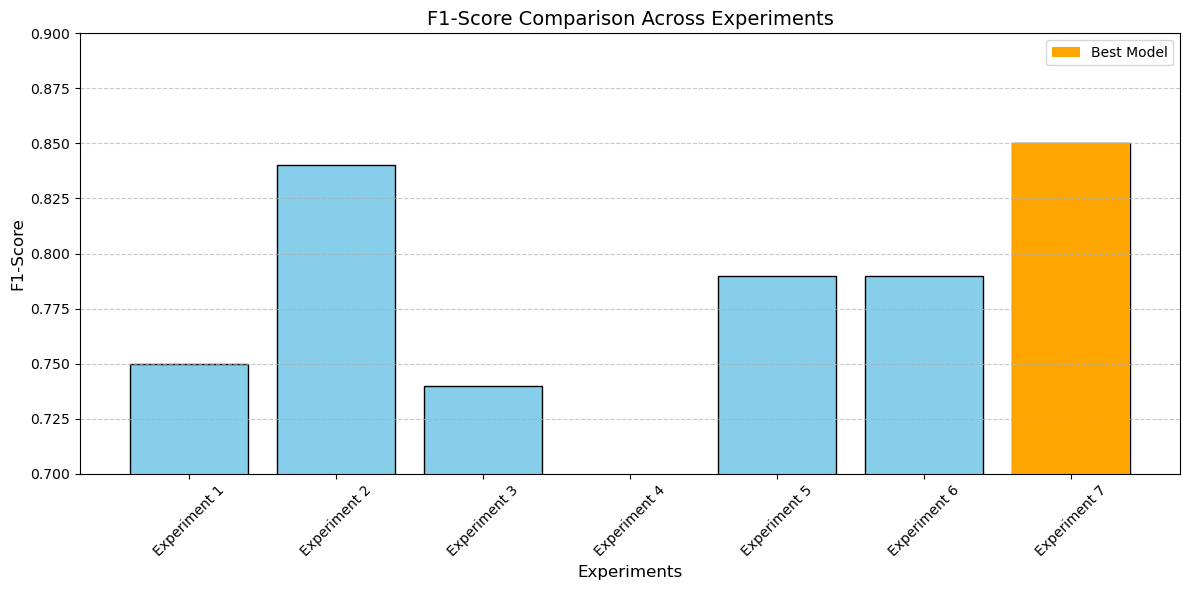

The best model is from Experiment 7 with an F1-score of 0.85.


In [10]:
import matplotlib.pyplot as plt

# F1-scores for each experiment (replace these with actual values from your results)
experiments = ["Experiment 1", "Experiment 2", "Experiment 3", "Experiment 4", "Experiment 5", "Experiment 6", "Experiment 7"]
f1_scores = [0.75, 0.84, 0.74, 0.67, 0.79, 0.79, 0.85]  # Placeholder values

# Determine the best experiment
best_experiment_index = f1_scores.index(max(f1_scores))

# Plotting F1-scores for comparison
plt.figure(figsize=(12, 6))
plt.bar(experiments, f1_scores, color='skyblue', edgecolor='black')
plt.bar(experiments[best_experiment_index], f1_scores[best_experiment_index], color='orange', label='Best Model')
plt.title("F1-Score Comparison Across Experiments", fontsize=14)
plt.xlabel("Experiments", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.ylim(0.7, 0.9)  # Adjust y-axis for better visualization
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

# Output the best experiment
print(f"The best model is from {experiments[best_experiment_index]} with an F1-score of {f1_scores[best_experiment_index]:.2f}.")


Save the final model using joblib.
Create a FastAPI application to serve the model.
Containerize the FastAPI application using Docker and push to Docker Hub.
Deploy the containerized API to a cloud platform


In [7]:
import joblib

# Save the best model
final_model_path = "final_model.joblib"
joblib.dump(pipeline, final_model_path, compress=3)
print(f"Model saved to {final_model_path}")


Model saved to final_model.joblib
